<a href="https://colab.research.google.com/github/subhedarsoham18/-binary-classifier-using-logistic-regression/blob/main/tree-based-models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, accuracy_score
from IPython.display import Image
import graphviz
import pandas as pd

# Step 1: Prepare data
# Load your data into a pandas DataFrame named 'df' here.
df = pd.read_csv('/content/heart.csv')

X = df.drop('target', axis=1)
y = df['target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=3)  # Starting with controlled depth
tree_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Visualize tree using graphviz
dot_data = export_graphviz(
    tree_clf, out_file=None,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True, rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)

accuracy, report, graph

(0.7804878048780488,
 {'0': {'precision': 0.8518518518518519,
   'recall': 0.6764705882352942,
   'f1-score': 0.7540983606557377,
   'support': 102.0},
  '1': {'precision': 0.7338709677419355,
   'recall': 0.883495145631068,
   'f1-score': 0.801762114537445,
   'support': 103.0},
  'accuracy': 0.7804878048780488,
  'macro avg': {'precision': 0.7928614097968937,
   'recall': 0.7799828669331811,
   'f1-score': 0.7779302375965913,
   'support': 205.0},
  'weighted avg': {'precision': 0.792573651542967,
   'recall': 0.7804878048780488,
   'f1-score': 0.7780464906548393,
   'support': 205.0}},
 <graphviz.sources.Source at 0x7807998f8850>)

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Step 2: Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)

rf_accuracy, rf_report


(0.9853658536585366,
 {'0': {'precision': 0.9714285714285714,
   'recall': 1.0,
   'f1-score': 0.9855072463768116,
   'support': 102.0},
  '1': {'precision': 1.0,
   'recall': 0.970873786407767,
   'f1-score': 0.9852216748768473,
   'support': 103.0},
  'accuracy': 0.9853658536585366,
  'macro avg': {'precision': 0.9857142857142858,
   'recall': 0.9854368932038835,
   'f1-score': 0.9853644606268295,
   'support': 205.0},
  'weighted avg': {'precision': 0.9857839721254356,
   'recall': 0.9853658536585366,
   'f1-score': 0.9853637641109759,
   'support': 205.0}})

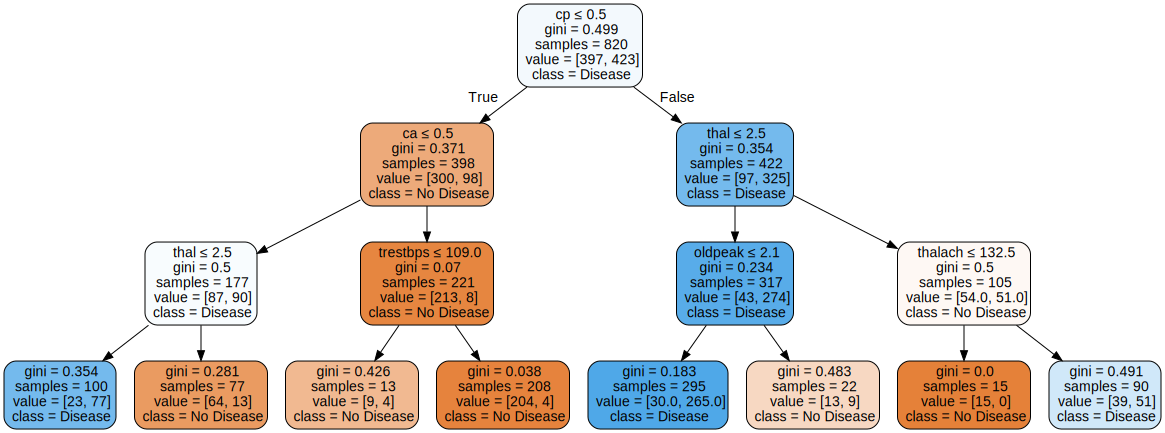

In [6]:
# Export DOT format and visualize
dot_data = export_graphviz(tree_clf, out_file=None, feature_names=X.columns,
                           class_names=['No Disease', 'Disease'],
                           filled=True, rounded=True, special_characters=True)
graphviz.Source(dot_data)

In [10]:
# Depth-limited tree
dt_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_limited.fit(X_train, y_train)

print("Depth-limited Accuracy:", accuracy_score(y_test, dt_limited.predict(X_test)))


Depth-limited Accuracy: 0.7804878048780488


In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

print("Random Forest Accuracy:", accuracy_score(y_test, rf.predict(X_test)))


Random Forest Accuracy: 0.9853658536585366


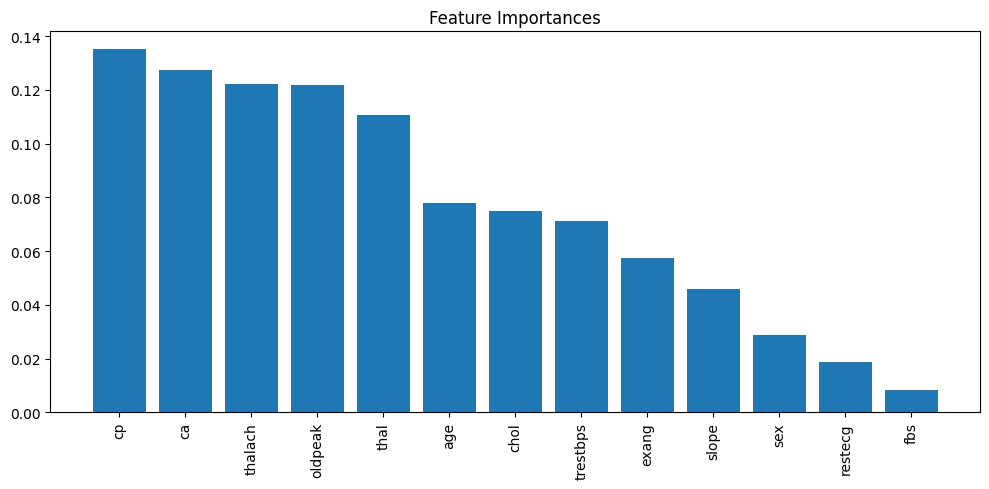

In [8]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


In [9]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
Mean CV Accuracy: 0.9970731707317073
